<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/LogisticRegression/regresi%C3%B3n_log%C3%ADstica_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias**

In [177]:
import pandas as pd 
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## **Collect and understand the data**

In [178]:
train='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/LogisticRegression/train%20-%20train%20(1).csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/LogisticRegression/train%20-%20train%20(1).csv'
gender='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/LogisticRegression/train%20-%20train%20(1).csv'

In [179]:
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')
gender=pd.read_csv(gender,sep=',')

In [180]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
train.shape

(891, 12)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [184]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Vamos analizar los nulos** 

<Axes: >

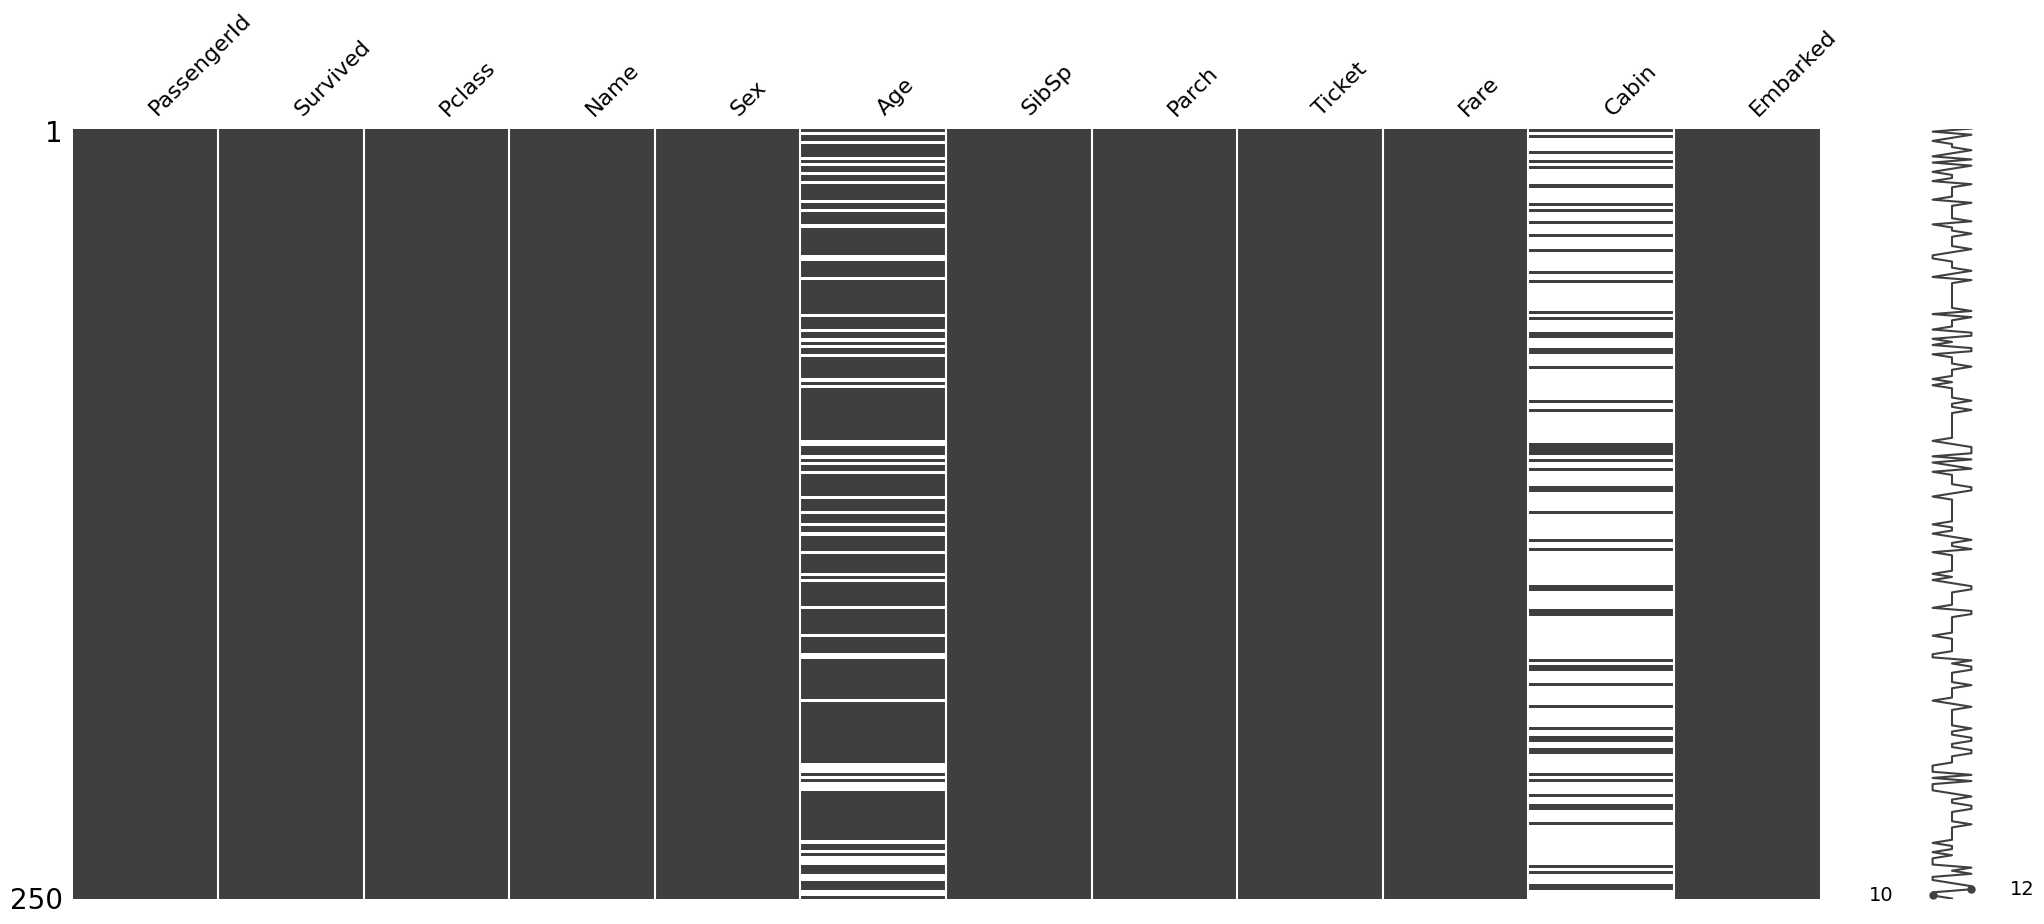

In [185]:
%matplotlib inline
msno.matrix(train.sample(250))

<Axes: >

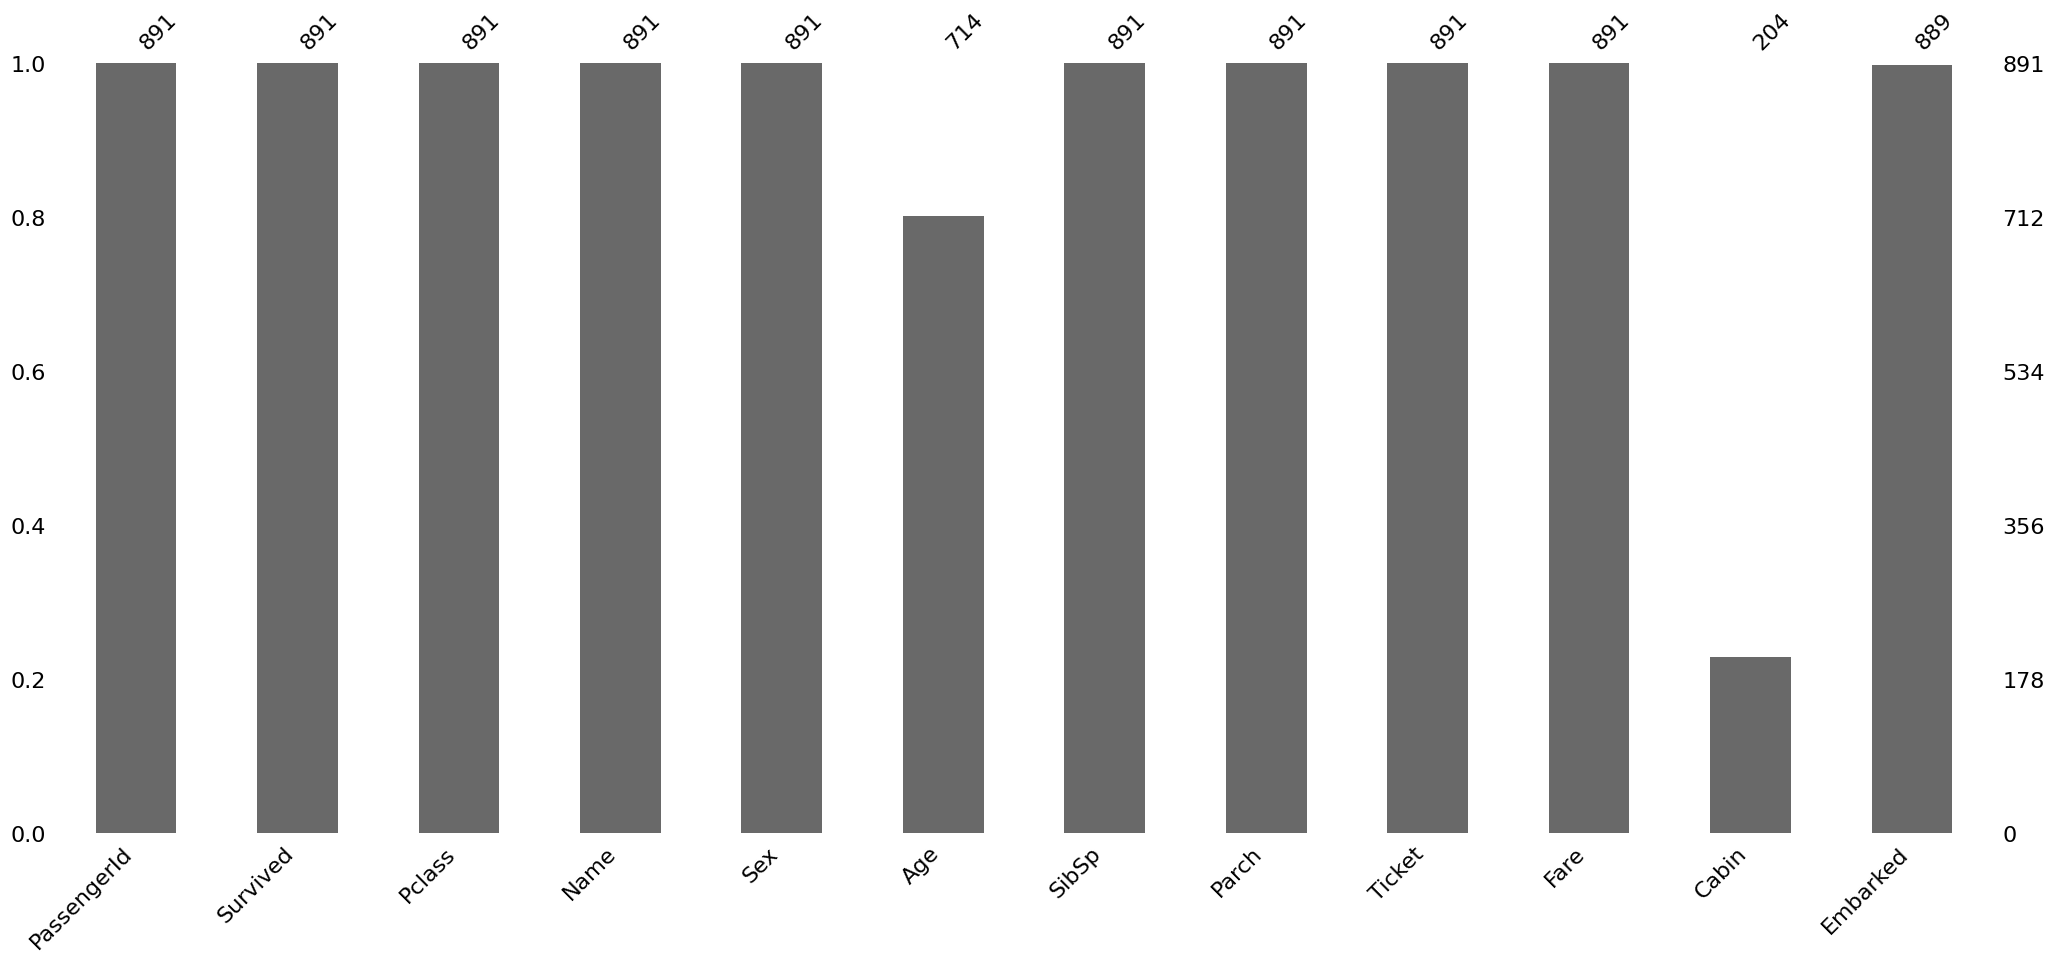

In [186]:
#columnas con valores nulos Age,cabin
msno.bar(train)

<Axes: >

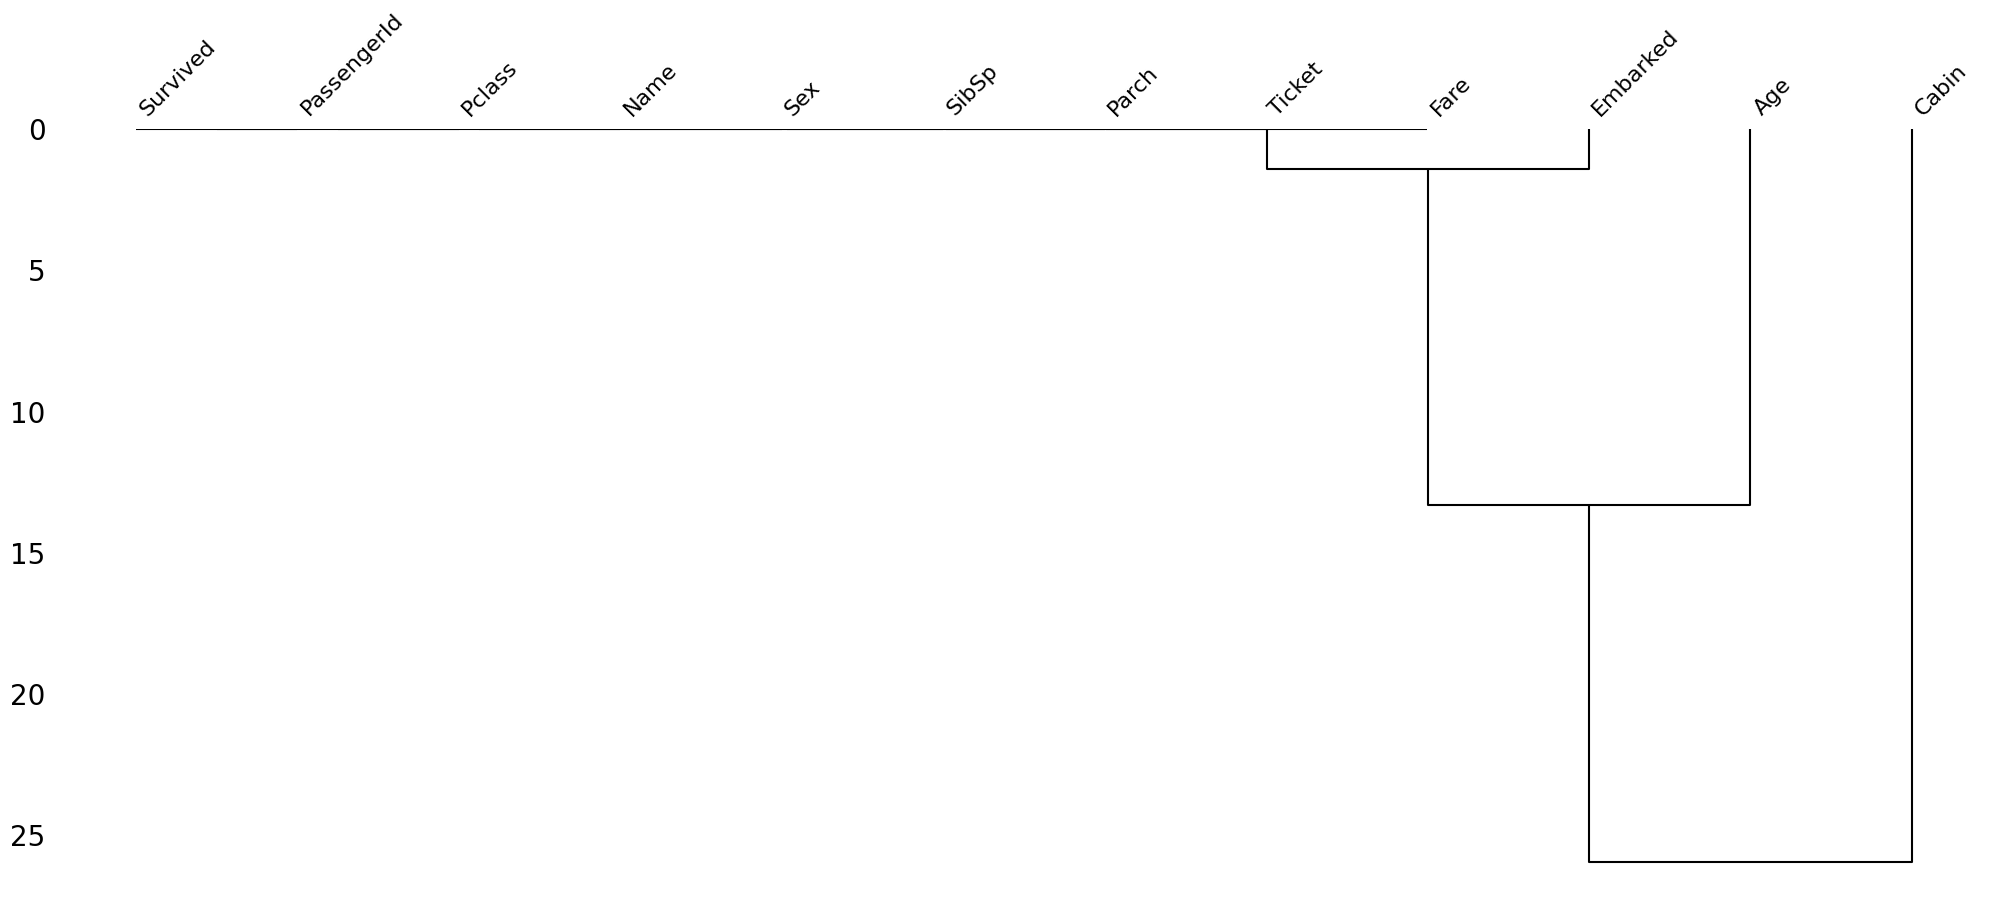

In [187]:
msno.dendrogram(train)

<Axes: >

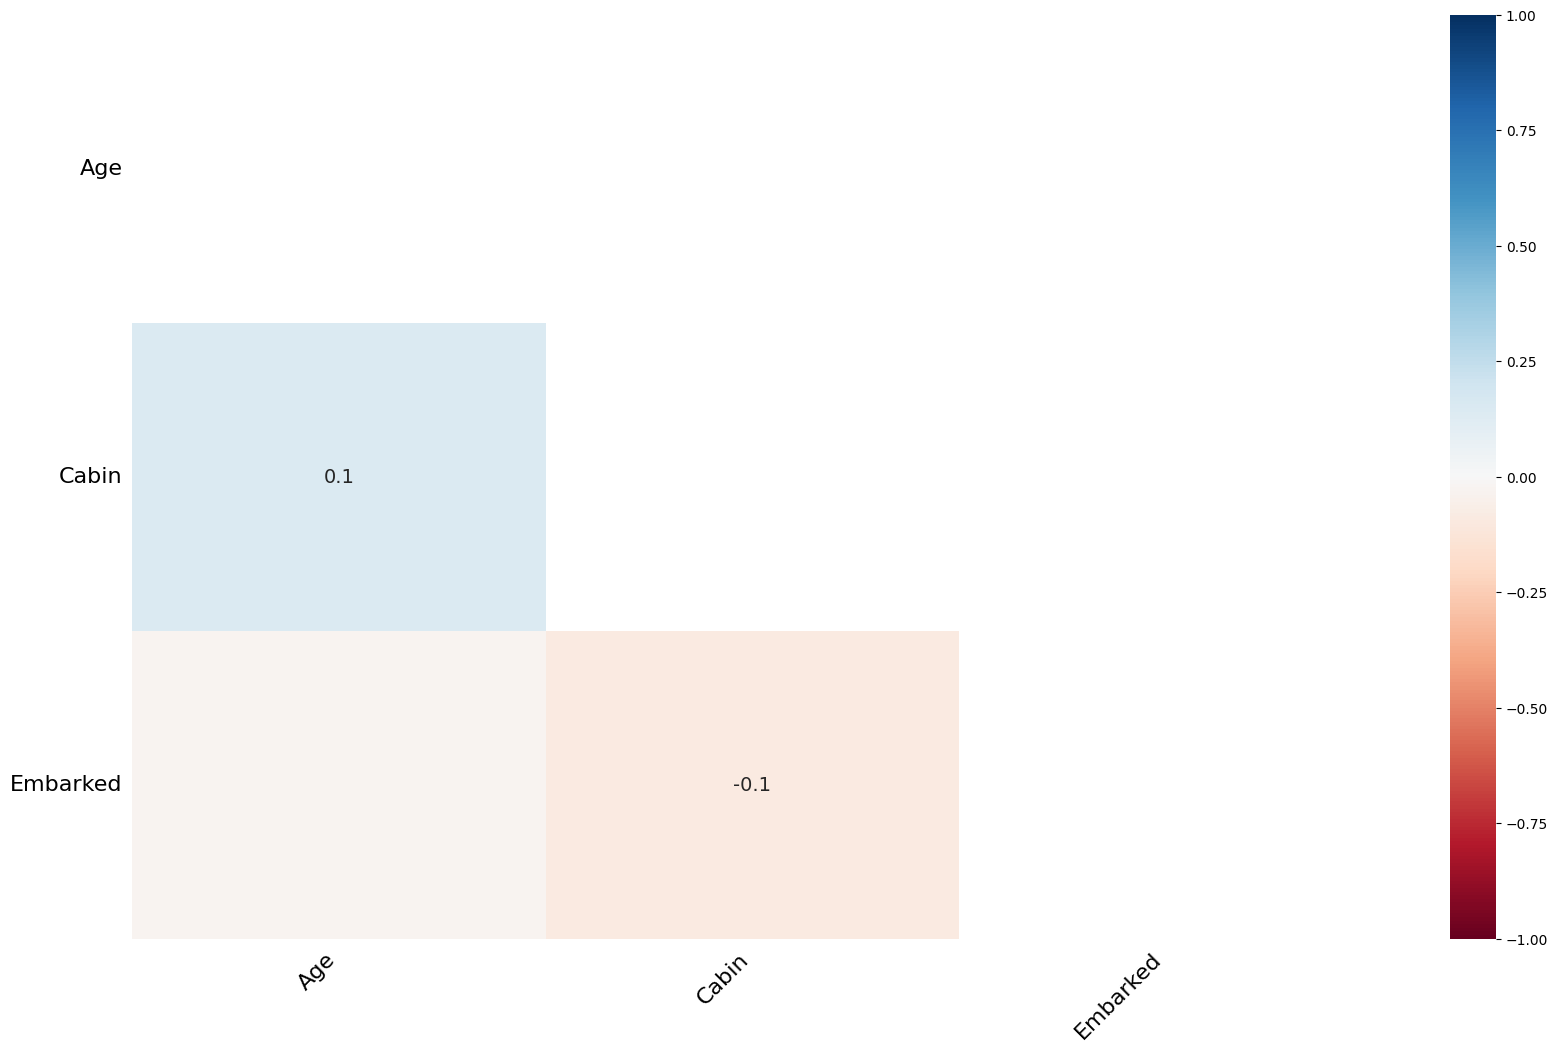

In [188]:
msno.heatmap(train)

## **Process the Data**

In [189]:
ports = pd.get_dummies(train['Embarked'] , prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [190]:
train=train.join(ports)
train.drop(['Embarked'],axis=1,inplace=True)

In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [192]:
train['Sex'].value_counts() #existe un total 577 hombres y 314 mujeres.

male      577
female    314
Name: Sex, dtype: int64

In [193]:
#Remplazamos los valores nulos de male por cero y female por uno.
train['Sex']=train['Sex'].map({'male':0,'female':1}) 

In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [195]:
#Extraer la varible del traject #la variables del tarject SURVIVED
y=train['Survived'].copy()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [196]:
#variable x eliminamos el tarject survived
X=train.drop(['Survived'],axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [197]:
#Eliminamos variables que no son importantes
#Cabin,Ticket,Name,PassengerId
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [198]:
X.drop(['Cabin'], axis=1, inplace=True) 

In [199]:
X.drop(['Ticket'], axis=1, inplace=True) 

In [200]:
X.drop(['Name'], axis=1, inplace=True) 

In [201]:
X.drop(['PassengerId'], axis=1, inplace=True)

In [202]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [204]:
X.isnull().values.any()

True

In [205]:
X.sample(40) #NAN en la columna AGE

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
848,2,0,28.0,0,1,33.0000,0,0,1
366,1,1,60.0,1,0,75.2500,1,0,0
183,2,0,1.0,2,1,39.0000,0,0,1
300,3,1,NaN,0,0,7.7500,0,1,0
862,1,1,48.0,0,0,25.9292,0,0,1
738,3,0,NaN,0,0,7.8958,0,0,1
459,3,0,NaN,0,0,7.7500,0,1,0
569,3,0,32.0,0,0,7.8542,0,0,1
881,3,0,33.0,0,0,7.8958,0,0,1
172,3,1,1.0,1,1,11.1333,0,0,1


In [206]:
#Columnas con NAN en total 117 filas
X[pd.isnull(X).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,3,0,NaN,0,0,8.4583,0,1,0
17,2,0,NaN,0,0,13.0000,0,0,1
19,3,1,NaN,0,0,7.2250,1,0,0
26,3,0,NaN,0,0,7.2250,1,0,0
28,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...
859,3,0,NaN,0,0,7.2292,1,0,0
863,3,1,NaN,8,2,69.5500,0,0,1
868,3,0,NaN,0,0,9.5000,0,0,1
878,3,0,NaN,0,0,7.8958,0,0,1


In [207]:
#vamos remplazar los valores faltantes por el promedio
X['Age'].fillna(X.Age.mean(),inplace=True)

In [208]:
X.isnull().values.any()

False

In [209]:
X.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

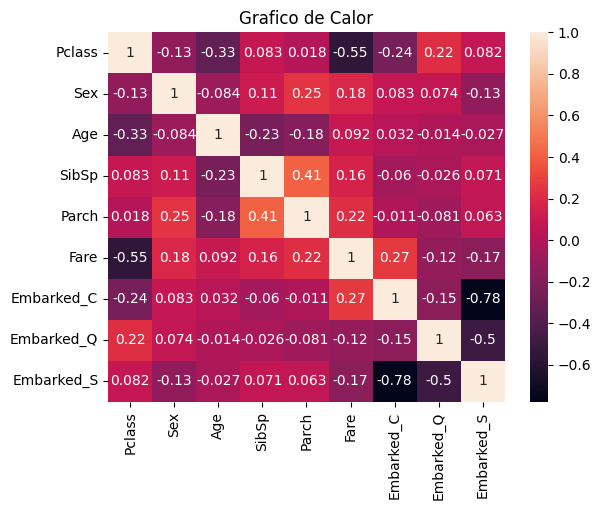

In [210]:
sns.heatmap(X.corr(),annot=True)
plt.title('Grafico de Calor')
plt.show()

## **Modelling**

### **Primera Forma**

In [211]:
from sklearn.model_selection import train_test_split
  # 80 % go into the training test, 20% in the validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,shuffle=True) 

In [212]:
#algoritmo supervivencia
def simple_heuristic(data):
  predictions=[] #crear una lista
  for passenger_index,passenger in data.iterrows():
    if passenger['Sex']==1: #sexo mujer
      predictions.append(1) #sobrevive
    elif passenger['Age']<18 and passenger['Pclass']==1:
      predictions.append(1) # sobrevive
    else:
      predictions.append(1) #no sobrevive
  return predictions

In [213]:
simplePredictions=simple_heuristic(X_test)
correct=sum(simplePredictions==y_test)
print(correct/len(y_test))

0.41899441340782123


In [214]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [215]:
model.fit(X_train, y_train)

LogisticRegression()

***Verificar si hay sobreajuste***

In [216]:
score_train=model.score(X_train,y_train).round(4) #data entrenamiento
score_train

0.802

In [217]:
score_val=model.score(X_test,y_test).round(4) #data validacion
score_val

0.8045

In [218]:
# Comparar puntajes
if score_val < score_train:
    print("El modelo podría estar sobreajustando.")
else:
    print("El modelo parece generalizar bien.")

El modelo parece generalizar bien.


In [219]:
print('Intercepto',model.intercept_)

Intercepto [1.53223136]


In [220]:
print('Coeficientes',model.coef_ )

Coeficientes [[-1.02016022e+00  2.76351299e+00 -3.64598328e-02 -2.60561137e-01
  -1.63165264e-01  2.76304251e-03  7.15308068e-01  2.81558170e-01
   2.59113808e-01]]


In [221]:
predictions = model.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [223]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [224]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.8019662921348315
Precision: 0.7581967213114754
Recall: 0.6928838951310862
F1 Score: 0.7240704500978474


### **Segunda Forma**

In [225]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 100,
                                        shuffle      = True
                                    )

In [226]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

         Current function value: 0.436004
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.3409
Time:                        03:23:24   Log-Likelihood:                -310.43
converged:                      False   LL-Null:                       -471.03
Covariance Type:            nonrobust   LLR p-value:                 8.259e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3374   4.23e+04      0.001      1.000   -8.29e+04     8.3e+04
Pclass        -1.0997      0.159     -6.916      0.000      -1.41

In [227]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [228]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.44692737430168%


In [229]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,91,13
1,22,53
